# **Electricity Price Forecasting**

**Author:** Milos Saric [https://saricmilos.com/]  
**Date:** December 10, 2025 - December 18th, 2025  
**Dataset:** Red Eléctrica — *[Spanish Electricity Market](https://www.ree.es/en/datos/generation)*  

---

This notebook explores Spanish electricity market datasets to build predictive models for forecasting tomorrow’s electricity prices using **machine learning** techniques. 
 
**Objective:**  
To develop an accurate **electricity price forecasting model** capable of anticipating day-ahead prices, helping energy producers, traders, and consumers make informed decisions.
The analysis will guide you through the complete data science workflow, including:

1. **Problem Definition** – Define the forecasting goal: predicting next-day electricity prices using historical data, demand patterns, and external factors (e.g., weather, holidays). Establish evaluation metrics such as **MAE, RMSE, MAPE**.  

2. **Data Collection & Overview** – Load and inspect datasets containing historical electricity prices, generation, demand, and weather information. Understand the structure, relationships, and key features.  

3. **Exploratory Data Analysis (EDA)** – Analyze price trends, daily/weekly patterns, seasonal effects, and correlations between electricity demand, weather, and prices. Visualize insights with plots.

4. **Data Preprocessing & Feature Engineering** – Clean data, handle missing values, create lag features, rolling averages, and encode categorical variables. Normalize features for model input.  

5. **Model Development** –  
- **Machine Learning Models:** Linear Regression, Random Forest, Gradient Boosting for price prediction.  

6. **Evaluation & Testing** – Assess model performance using metrics like MAE, RMSE, and MAPE. Compare approaches, visualize predicted vs actual prices, and interpret model results.  

7. **Deployment & Future Work** – Discuss strategies for deploying the forecasting model (via FastAPI) and potential improvements with more features or hybrid models.
---

# **About Electricity Price Forecasting Systems**

Electricity prices fluctuate rapidly throughout the day, influenced by factors such as **demand**, **weather conditions**, **fuel costs**, and the availability of **renewable energy sources** like wind and solar. Predicting these prices is essential for ensuring stability, optimizing energy usage, reducing costs, and enabling smarter grid management.

In modern energy systems, accurate forecasting plays a key role in helping both providers and consumers make informed decisions. Energy companies rely on forecasts to determine when to buy or sell electricity, while consumers and businesses can adjust consumption to take advantage of cheaper prices or avoid expensive peak periods.  

Because electricity **CAN NOT be stored easily**, unlike fossil fuels (gas,oil,coal etc.) it must be produced (or bought) the moment it is needed. This means supply and demand factors have an **immediate** impact on price, making forecasting a challenging yet vital task.

Effective electricity price prediction has several important applications:

- **Optimizing electricity storage** and battery usage.  
- **Enabling demand-side flexibility**, helping buildings reduce consumption during expensive periods (and increase during low or negative price periods).  
- **Reducing carbon emissions**, since electricity price often correlates with carbon intensity of generation.  
- **Supporting grid stability**, reducing strain during peak hours and balancing supply and demand efficiently.  

---

## **1. Problem Definition**

The first step is to establish a clear understanding of the forecasting challenge. This creates the foundation for the entire project and ensures all further work stays aligned with the primary objective.

### **Objective**
Develop an **electricity price forecasting system** that predicts **day-ahead electricity prices** using historical price data, generation and demand patterns, weather variables, and other relevant features.  
The system should generate accurate forecasts that support smarter decision-making for energy providers, grid operators, and end users.

### **Scope**
The analysis focuses on electricity market data, which includes:

- **Historical electricity prices** — day-ahead and intraday market values.  
- **Energy generation data** — renewable and non-renewable production levels.  
- **Weather data** — temperature, solar irradiance, wind speed, etc.  
- **Demand/load data** — total electricity consumption patterns.  

Predictions will be based on the dataset provided, with optional integration of external weather or market data in advanced stages.

### **Stakeholders**
- **Energy Providers / Traders:** Optimize buying and selling strategies to reduce risk and increase profitability.  
- **Grid Operators:** Improve load balancing and ensure efficient grid stability.  
- **Businesses & Industries:** Adjust operational schedules to lower electricity costs.  
- **Consumers:** Reduce electricity bills through smarter usage patterns.  
- **Data Scientists / ML Engineers:** Explore forecasting algorithms and improve model accuracy.  

### **Success Criteria**
A successful forecasting system should produce **accurate, reliable, and robust predictions**, assessed using metrics such as:

- **RMSE** — Root Mean Squared Error  
- **MAE** — Mean Absolute Error  
- **MAPE** — Mean Absolute Percentage Error  

These metrics measure how close the predicted prices are to real future prices.

> A clearly defined problem enables the development of a powerful and effective electricity price forecasting model that supports smarter, greener, and more efficient energy systems.

## **2. Data Collection**

The **Data Collection** phase focuses on gathering and preparing the datasets required to build and evaluate the electricity price forecasting models. This step also involves importing essential libraries, setting up the working environment, and organizing reusable functions to ensure a smooth analysis workflow.

## **Dataset Description**



---

We can begin by:
1. Loading each dataset (`energy_dataset`, `weather_features`,) individually.  
2. Performing exploratory data analysis (EDA) to understand distributions and missing values.  
3. Merging the datasets to form a unified view of user–book interactions.  
4. Building and evaluating different recommendation approaches. 

# Required Libraries Import

### Setting working paths

In [1]:
import sys
from pathlib import Path
from datetime import timedelta

In [2]:
# Go up one level from /notebooks to the main folder
project_root = Path.cwd().parent

In [3]:
sys.path.append(str(project_root))

### Core Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Modules

In [5]:
%load_ext autoreload
%autoreload 2

# Modules
from src.dataloader import load_all_csvs_from_folder
from src.missing_values import (
    missing_values_heatmap,
    missing_values_barchart,
    get_missing_value_summary
    )
from src.unique_values import (
    get_column_types,
    plot_number_of_unique_values,
    unique_values
    )

In [6]:
# Build the path to the data file
data_path = project_root / "data"


In [7]:
energy_dataset_test = pd.read_csv(data_path / "energy_dataset.csv")

In [8]:
datasets = load_all_csvs_from_folder(data_path,low_memory = False)

In [9]:
print(f"{datasets.keys()}")

dict_keys(['energy_dataset', 'weather_features'])


In [10]:
energy_df, weather_df = (datasets.get(key) for key in ["energy_dataset","weather_features"])

In [11]:
energy_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [12]:
energy_df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [13]:
weather_df.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [14]:
weather_df.columns

Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [15]:
for df in [energy_df, weather_df]:
    df.columns = (
        df.columns
        .str.strip()            # Remove leading/trailing whitespace
        .str.lower()            # Convert all column names to lowercase
        .str.replace(' ', '_', regex=False)  # Replace hyphens with underscores
    )

##  **3. Exploratory Data Analysis (EDA)**

Exploratory Data Analysis is all about **understanding the dataset**, uncovering patterns, spotting anomalies, and generating insights that will guide feature engineering and modeling.

In [16]:
energy_df.shape

(35064, 29)

In [17]:
weather_df.shape

(178396, 17)

In [18]:
shapes = pd.DataFrame({
    "Dataset": ["energy_df", "weather_df"],
    "Rows": [energy_df.shape[0], weather_df.shape[0]],
    "Columns": [energy_df.shape[1], weather_df.shape[1]]
})

print(shapes.to_string(index=False))

   Dataset   Rows  Columns
 energy_df  35064       29
weather_df 178396       17


# **3.1. Energy Dataset**

### **3.1.1. Basic Information**

In [19]:
original_energy_df = energy_df.copy()

In [20]:
energy_df.head()

,time,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_coal-derived_gas,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_fossil_oil_shale,generation_fossil_peat,generation_geothermal,...,generation_waste,generation_wind_offshore,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_offshore_eday_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [21]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation_biomass                           35045 non-null  float64
 2   generation_fossil_brown_coal/lignite         35046 non-null  float64
 3   generation_fossil_coal-derived_gas           35046 non-null  float64
 4   generation_fossil_gas                        35046 non-null  float64
 5   generation_fossil_hard_coal                  35046 non-null  float64
 6   generation_fossil_oil                        35045 non-null  float64
 7   generation_fossil_oil_shale                  35046 non-null  float64
 8   generation_fossil_peat                       35046 non-null  float64
 9   generation_geothermal                        35046 non-null  float64
 10

All of the data types makes sense except time which needs to be a datetime type and made the index. 

In [22]:
# Convert to datetime in UTC, then to Spain local time
energy_df['datetime'] = pd.to_datetime(energy_df['time'], utc=True).dt.tz_convert('Europe/Madrid')
energy_df.drop('time', axis=1, inplace=True)

If all our times are unique we can set our time columns as index.

In [23]:
energy_df["datetime"].nunique()

35064

In [24]:
unique_values(energy_df)

,Column,UniqueValues,TotalValues,UniquePercent
0,datetime,35064,35064,100.00
1,total_load_actual,15127,35064,43.14
2,total_load_forecast,14790,35064,42.18
3,generation_wind_onshore,11465,35064,32.70
4,forecast_wind_onshore_day_ahead,11332,35064,32.32
5,generation_fossil_gas,8297,35064,23.66
6,generation_fossil_hard_coal,7266,35064,20.72
7,generation_hydro_water_reservoir,7029,35064,20.05
8,price_actual,6653,35064,18.97
9,price_day_ahead,5747,35064,16.39


In [25]:
energy_df.set_index("datetime",inplace=True)

Sort rows with datetime index chronologically

In [26]:
energy_df.sort_index(inplace=True)

In [27]:
energy_df.head()

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_coal-derived_gas,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_fossil_oil_shale,generation_fossil_peat,generation_geothermal,generation_hydro_pumped_storage_aggregated,...,generation_waste,generation_wind_offshore,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_offshore_eday_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [28]:
energy_df.tail()

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_coal-derived_gas,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_fossil_oil_shale,generation_fossil_peat,generation_geothermal,generation_hydro_pumped_storage_aggregated,...,generation_waste,generation_wind_offshore,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_offshore_eday_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
datetime,,,,,,,,,,,,,,,,,,,,,
2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,NaN,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,NaN,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,NaN,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,NaN,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89
2018-12-31 23:00:00+01:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,NaN,...,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88


In [29]:
energy_df.describe()

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_coal-derived_gas,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_fossil_oil_shale,generation_fossil_peat,generation_geothermal,generation_hydro_pumped_storage_aggregated,...,generation_waste,generation_wind_offshore,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_offshore_eday_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


### **3.1.2. Missing Values Information**

In [30]:
energy_df.isna().sum()

generation_biomass                                19
generation_fossil_brown_coal/lignite              18
generation_fossil_coal-derived_gas                18
generation_fossil_gas                             18
generation_fossil_hard_coal                       18
generation_fossil_oil                             19
generation_fossil_oil_shale                       18
generation_fossil_peat                            18
generation_geothermal                             18
generation_hydro_pumped_storage_aggregated     35064
generation_hydro_pumped_storage_consumption       19
generation_hydro_run-of-river_and_poundage        19
generation_hydro_water_reservoir                  18
generation_marine                                 19
generation_nuclear                                17
generation_other                                  18
generation_other_renewable                        18
generation_solar                                  18
generation_waste                              

In [31]:
na_counts_energy_df = energy_df.isna().sum().reset_index()
na_counts_energy_df.columns = ["Feature", "Missing Values"]

In [32]:
na_counts_energy_df

,Feature,Missing Values
0,generation_biomass,19
1,generation_fossil_brown_coal/lignite,18
2,generation_fossil_coal-derived_gas,18
3,generation_fossil_gas,18
4,generation_fossil_hard_coal,18
5,generation_fossil_oil,19
6,generation_fossil_oil_shale,18
7,generation_fossil_peat,18
8,generation_geothermal,18
9,generation_hydro_pumped_storage_aggregated,35064


We can drop columns "generation_hydro_pumped_storage_aggregated" and "forecast_wind_offshore_eday_ahead"

In [33]:
energy_df.drop([
    "forecast_wind_offshore_eday_ahead",
    "generation_hydro_pumped_storage_aggregated"
], axis=1, inplace=True)

In [34]:
get_missing_value_summary(energy_df)

,Column,Dtype,TotalValues,MissingValues,NonMissingValues,MissingPercent
0,generation_biomass,float64,35064,19,35045,0.054187
1,generation_fossil_brown_coal/lignite,float64,35064,18,35046,0.051335
2,generation_fossil_coal-derived_gas,float64,35064,18,35046,0.051335
3,generation_fossil_gas,float64,35064,18,35046,0.051335
4,generation_fossil_hard_coal,float64,35064,18,35046,0.051335
5,generation_fossil_oil,float64,35064,19,35045,0.054187
6,generation_fossil_oil_shale,float64,35064,18,35046,0.051335
7,generation_fossil_peat,float64,35064,18,35046,0.051335
8,generation_geothermal,float64,35064,18,35046,0.051335
9,generation_hydro_pumped_storage_consumption,float64,35064,19,35045,0.054187


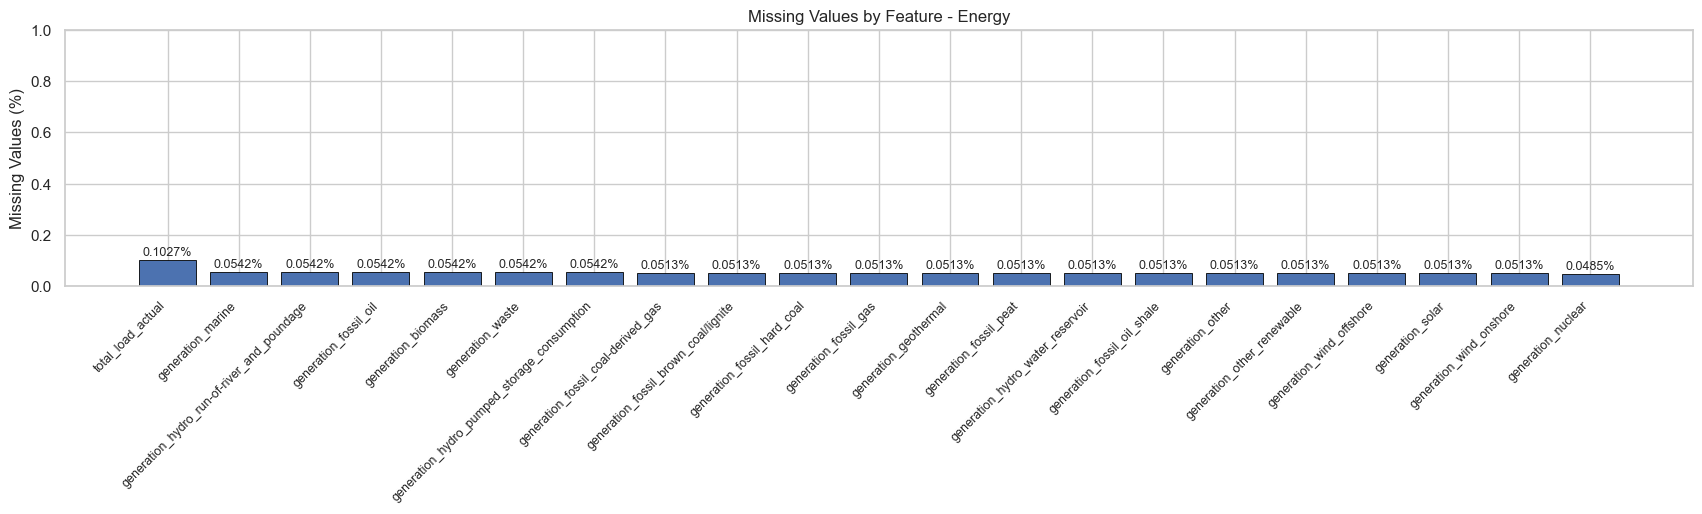

total_load_actual                              0.102669
generation_marine                              0.054187
generation_hydro_run-of-river_and_poundage     0.054187
generation_fossil_oil                          0.054187
generation_biomass                             0.054187
generation_waste                               0.054187
generation_hydro_pumped_storage_consumption    0.054187
generation_fossil_coal-derived_gas             0.051335
generation_fossil_brown_coal/lignite           0.051335
generation_fossil_hard_coal                    0.051335
generation_fossil_gas                          0.051335
generation_geothermal                          0.051335
generation_fossil_peat                         0.051335
generation_hydro_water_reservoir               0.051335
generation_fossil_oil_shale                    0.051335
generation_other                               0.051335
generation_other_renewable                     0.051335
generation_wind_offshore                       0

In [35]:
missing_values_barchart(energy_df,"Energy")

The dataset shows that many generation-related variables contain a small but noticeable number of missing values. For most features, the proportion of missing data falls between **0.05% and 0.06%**, while a few variables—such as **total_load_actual**—have slightly higher missing rates of around **0.10%**. Although these percentages are relatively low, the fact that missing values appear across numerous key fields suggests that the gaps may not be entirely random.

Since these variables are essential for analyzing energy production and load behavior, the missing entries could have an impact on downstream models and interpretations. It is therefore important to **investigate the origin, pattern, and potential implications** of these missing values. Additional inspection—such as checking for time-based patterns, correlations with external events, or systemic reporting issues—will help determine the appropriate handling method, whether through imputation, filtering, or other approaches.

In [36]:
energy_df[energy_df.isnull().any(axis=1)]

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_coal-derived_gas,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_fossil_oil_shale,generation_fossil_peat,generation_geothermal,generation_hydro_pumped_storage_consumption,...,generation_solar,generation_waste,generation_wind_offshore,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-05 03:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,546.0,8233.0,21912.0,21182.0,35.20,59.68
2015-01-05 12:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3932.0,9258.0,23209.0,NaN,35.50,79.14
2015-01-05 13:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4236.0,9156.0,23725.0,NaN,36.80,73.95
2015-01-05 14:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4215.0,9072.0,23614.0,NaN,32.50,71.93
2015-01-05 15:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4050.0,8779.0,22381.0,NaN,30.00,71.50
2015-01-05 16:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3728.0,8426.0,21371.0,NaN,30.00,71.85
2015-01-05 17:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3175.0,7946.0,20760.0,NaN,30.60,80.53
2015-01-19 19:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,91.0,6434.0,38642.0,39304.0,70.01,88.95
2015-01-19 20:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,28.0,6907.0,38758.0,39262.0,69.00,87.94


The maximum number of missing values in any column is **36**, which is very small compared to the total of **35,046** rows. When inspecting the rows where generation data is missing, a clear pattern appears: whenever one generation-related column contains a missing value, **all generation columns in that row are missing**. This indicates that the missing data occurs in complete blocks rather than independently.

Since these rows contain no usable generation information, they do not contribute meaningfully to the analysis. Dropping them is therefore appropriate and results in only a minimal loss of data while ensuring that all remaining rows contain complete generation records.

In [37]:
energy_df.dropna(inplace = True)

In [38]:
energy_df.isna().sum()

generation_biomass                             0
generation_fossil_brown_coal/lignite           0
generation_fossil_coal-derived_gas             0
generation_fossil_gas                          0
generation_fossil_hard_coal                    0
generation_fossil_oil                          0
generation_fossil_oil_shale                    0
generation_fossil_peat                         0
generation_geothermal                          0
generation_hydro_pumped_storage_consumption    0
generation_hydro_run-of-river_and_poundage     0
generation_hydro_water_reservoir               0
generation_marine                              0
generation_nuclear                             0
generation_other                               0
generation_other_renewable                     0
generation_solar                               0
generation_waste                               0
generation_wind_offshore                       0
generation_wind_onshore                        0
forecast_solar_day_a

In [39]:
energy_df.describe()

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_coal-derived_gas,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_fossil_oil_shale,generation_fossil_peat,generation_geothermal,generation_hydro_pumped_storage_consumption,...,generation_solar,generation_waste,generation_wind_offshore,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
count,35017.000000,35017.000000,35017.0,35017.000000,35017.000000,35017.000000,35017.0,35017.0,35017.0,35017.000000,...,35017.000000,35017.000000,35017.0,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000
mean,383.529800,448.103207,0.0,5622.411829,4255.571694,298.333095,0.0,0.0,0.0,475.726047,...,1433.093669,269.501299,0.0,5466.078048,1439.163064,5471.858926,28710.977697,28696.840078,49.869153,57.887179
std,85.304489,354.605379,0.0,2202.018147,1961.428697,52.470724,0.0,0.0,0.0,792.553651,...,1680.331016,50.143711,0.0,3213.624333,1677.872467,3176.482768,4592.401419,4574.238252,14.618269,14.190275
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,0.000000,...,71.000000,240.000000,0.0,2935.000000,69.000000,2980.000000,24795.000000,24808.000000,41.490000,49.360000
50%,367.000000,509.000000,0.0,4968.000000,4473.000000,300.000000,0.0,0.0,0.0,68.000000,...,616.000000,279.000000,0.0,4850.000000,576.000000,4856.000000,28905.000000,28902.000000,50.510000,58.020000
75%,433.000000,757.000000,0.0,6428.000000,5837.000000,330.000000,0.0,0.0,0.0,616.000000,...,2579.000000,310.000000,0.0,7399.000000,2636.000000,7352.000000,32263.000000,32192.000000,60.530000,68.000000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,4523.000000,...,5792.000000,357.000000,0.0,17436.000000,5836.000000,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [40]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35017 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation_biomass                           35017 non-null  float64
 1   generation_fossil_brown_coal/lignite         35017 non-null  float64
 2   generation_fossil_coal-derived_gas           35017 non-null  float64
 3   generation_fossil_gas                        35017 non-null  float64
 4   generation_fossil_hard_coal                  35017 non-null  float64
 5   generation_fossil_oil                        35017 non-null  float64
 6   generation_fossil_oil_shale                  35017 non-null  float64
 7   generation_fossil_peat                       35017 non-null  float64
 8   generation_geothermal                        35017 non-null  float64
 9   generation_hydro_pumped_s

### **3.1.3. Unique Values Information**

In [41]:
cat_cols_energy, int_cols_energy, float_cols_energy = get_column_types(energy_df)

Categorical variables:
[]

Integer variables:
[]

Real (float) variables:
['generation_biomass', 'generation_fossil_brown_coal/lignite', 'generation_fossil_coal-derived_gas', 'generation_fossil_gas', 'generation_fossil_hard_coal', 'generation_fossil_oil', 'generation_fossil_oil_shale', 'generation_fossil_peat', 'generation_geothermal', 'generation_hydro_pumped_storage_consumption', 'generation_hydro_run-of-river_and_poundage', 'generation_hydro_water_reservoir', 'generation_marine', 'generation_nuclear', 'generation_other', 'generation_other_renewable', 'generation_solar', 'generation_waste', 'generation_wind_offshore', 'generation_wind_onshore', 'forecast_solar_day_ahead', 'forecast_wind_onshore_day_ahead', 'total_load_forecast', 'total_load_actual', 'price_day_ahead', 'price_actual']


In [42]:
unique_values(energy_df)

,Column,UniqueValues,TotalValues,UniquePercent
0,total_load_actual,15123,35017,43.19
1,total_load_forecast,14786,35017,42.23
2,generation_wind_onshore,11462,35017,32.73
3,forecast_wind_onshore_day_ahead,11329,35017,32.35
4,generation_fossil_gas,8293,35017,23.68
5,generation_fossil_hard_coal,7265,35017,20.75
6,generation_hydro_water_reservoir,7029,35017,20.07
7,price_actual,6641,35017,18.97
8,price_day_ahead,5747,35017,16.41
9,forecast_solar_day_ahead,5356,35017,15.30


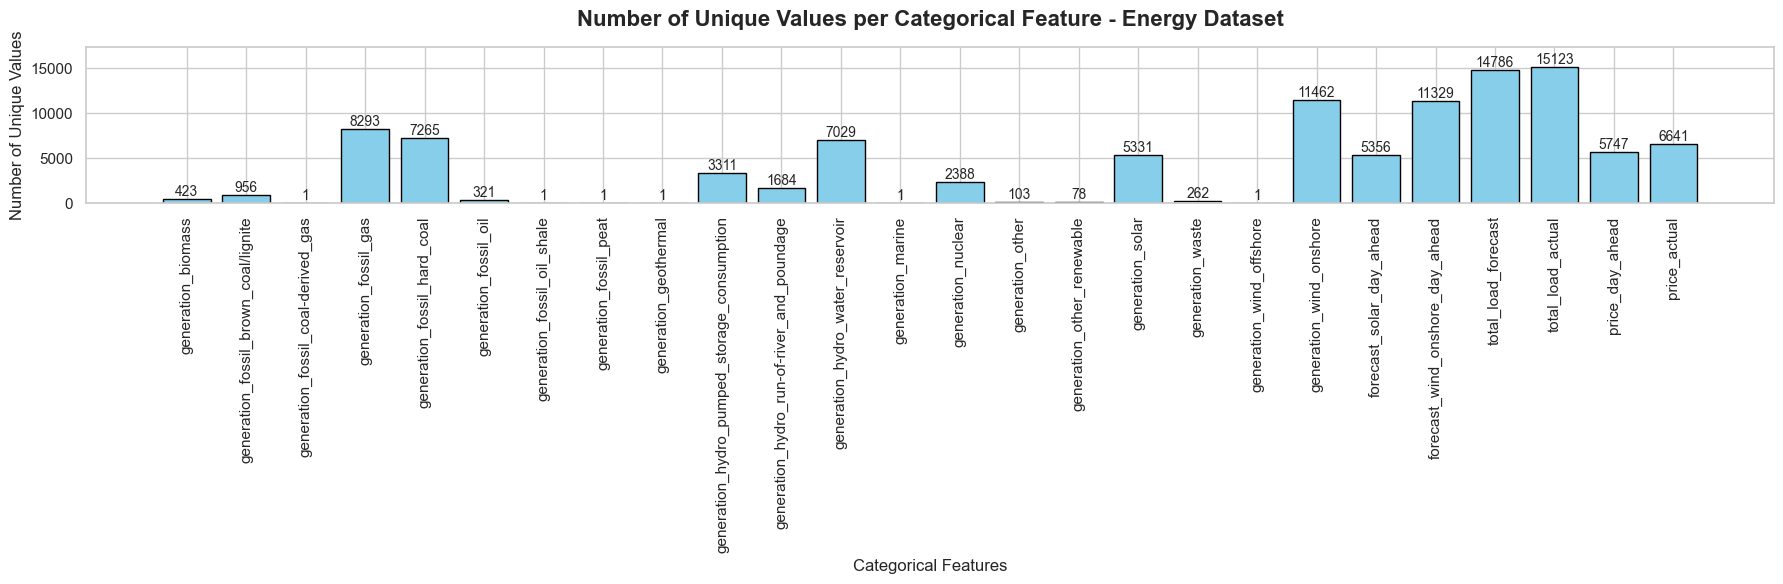

In [43]:
plot_number_of_unique_values(energy_df,float_cols_energy,"Energy Dataset")

In [44]:
energy_df[[
    "generation_fossil_oil_shale",
    "generation_fossil_coal-derived_gas",
    "generation_geothermal",
    "generation_fossil_peat",
    "generation_marine",
    "generation_wind_offshore"
]].head()

,generation_fossil_oil_shale,generation_fossil_coal-derived_gas,generation_geothermal,generation_fossil_peat,generation_marine,generation_wind_offshore
datetime,,,,,,
2015-01-01 00:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 01:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 02:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 03:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 04:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0


We can drop these 6 columns because they have only one value which is 0.

In [45]:
energy_df.drop([
    "generation_fossil_oil_shale",
    "generation_fossil_coal-derived_gas",
    "generation_geothermal",
    "generation_fossil_peat",
    "generation_marine",
    "generation_wind_offshore"
],axis=1,inplace=True)

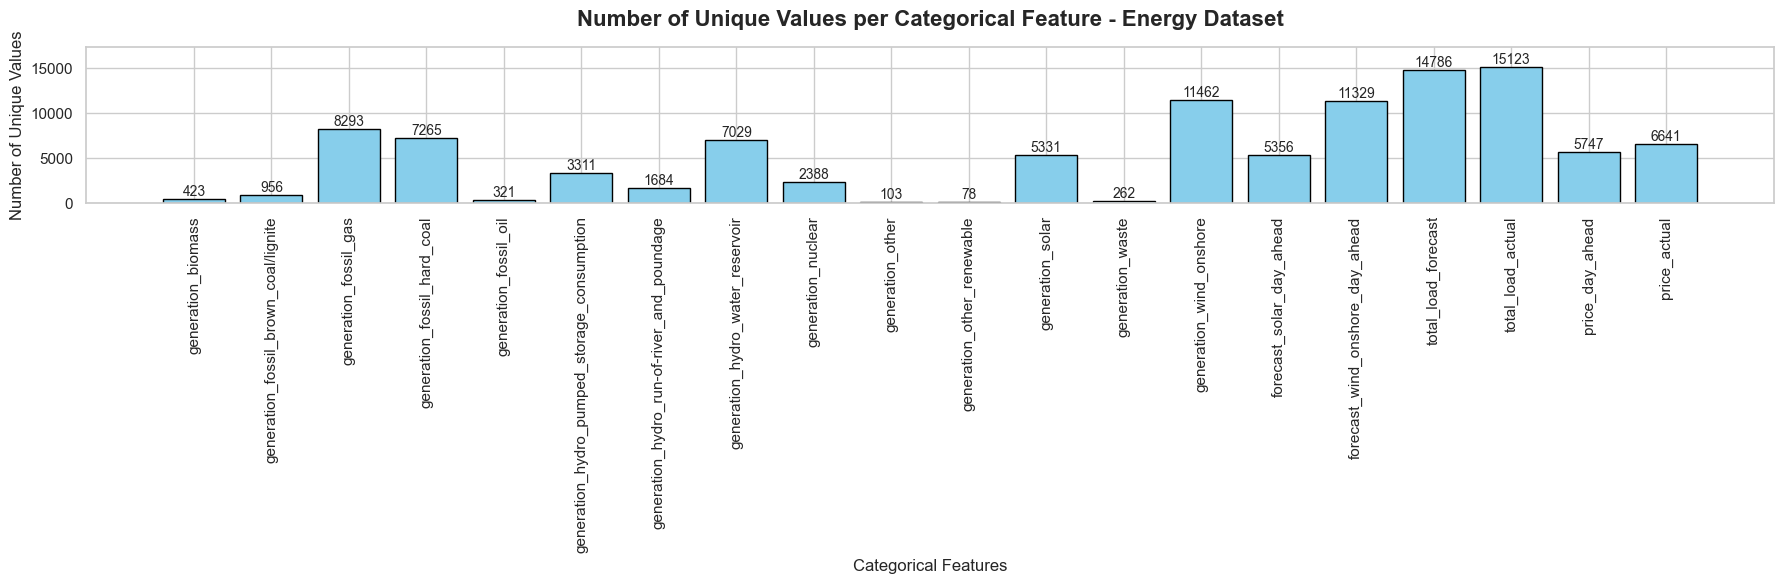

In [46]:
plot_number_of_unique_values(energy_df,energy_df.columns,"Energy Dataset")

In [47]:
energy_df.head()

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
datetime,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


### **3.1.4. Generation Features**

We observe that all features containing information about energy generation share a common naming pattern: they all begin with the prefix **`generation_`** (e.g., `generation_biomass`, `generation_fossil_brown_coal/lignite`). Because of this consistent structure, we can easily collect all generation-related columns by selecting those whose names start with this prefix. Grouping these columns allows us to efficiently inspect and analyze the generation data as a unified set.

In [48]:
generation_cols = [col for col in energy_df.columns if col.startswith('generation')]

In [49]:
energy_df[generation_cols].describe()

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore
count,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000
mean,383.529800,448.103207,5622.411829,4255.571694,298.333095,475.726047,972.090956,2604.536168,6264.056687,60.237256,85.651141,1433.093669,269.501299,5466.078048
std,85.304489,354.605379,2202.018147,1961.428697,52.470724,792.553651,400.753545,1834.944644,838.260925,20.236345,14.063909,1680.331016,50.143711,3213.624333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1077.000000,5760.000000,53.000000,74.000000,71.000000,240.000000,2935.000000
50%,367.000000,509.000000,4968.000000,4473.000000,300.000000,68.000000,906.000000,2164.000000,6564.000000,57.000000,88.000000,616.000000,279.000000,4850.000000
75%,433.000000,757.000000,6428.000000,5837.000000,330.000000,616.000000,1250.000000,3755.000000,7024.000000,80.000000,97.000000,2579.000000,310.000000,7399.000000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000


The summary statistics for the generation-related features provide a clear overview of how different energy sources contribute over time. Each column contains **35,017 valid observations**, indicating that a small number of rows were removed due to missing generation values.

A few key insights stand out:

1. **Wide variation across energy sources**  
   Some generation types, such as **fossil gas**, **wind onshore**, and **nuclear**, have very high average outputs (often several thousand megawatts). In contrast, sources like **biomass**, **oil**, and **other renewables** produce much smaller amounts on average.

2. **Large ranges and skewed distributions**  
   Many features have minimum values of **0**, reflecting periods with no generation (common for solar at night or pumped hydro when inactive).  
   Maximum values vary widely—for example, fossil gas reaches **20,034 MW**, far exceeding the output of smaller sources like waste or oil.

3. **High variability in output**  
   Standard deviations are large for several features (e.g., fossil gas, wind onshore, hydro reservoir), meaning these sources fluctuate substantially over time. Others, like nuclear or waste, have more stable production levels, indicated by smaller standard deviations relative to their means.

4. **Seasonal or operational patterns**  
   Percentile differences (25%, 50%, 75%) show that some sources produce consistently (e.g., nuclear), while others have highly dynamic behavior. Solar, for example, has a median much lower than its upper quartile, reflecting spikes during sunny periods.

Overall, these statistics reveal both the diversity and variability of the energy mix. The dataset covers sources that operate continuously (like nuclear), seasonally (like solar), intermittently (like wind), and on-demand (like hydro pumped storage). This variability is crucial to account for in downstream modeling or forecasting tasks.

The summary statistics show that different generation sources reach very different maximum values, reflecting their scale and role in the energy system:

- **Fossil gas** has the highest maximum output at **20,034 MW**, making it the largest single contributor at peak times.  
- **Wind onshore** also reaches very high values, up to **17,436 MW**, reflecting periods of strong wind production.  
- **Hydro water reservoir** and **hydro pumped storage consumption** have maxima of **9,728 MW** and **4,523 MW**, respectively, highlighting the potential for large-scale hydro generation and storage-based flexibility.  
- **Nuclear** shows a relatively high maximum of **7,117 MW**, consistent with its role as a stable, high-output baseload source.  
- In contrast, smaller sources like **biomass (592 MW)**, **oil (449 MW)**, **other renewables (119 MW)**, and **waste (357 MW)** have much lower peaks, reflecting limited capacity or more intermittent use.

These maxima indicate that while some sources can produce large amounts of power during peak conditions, others contribute consistently but at much smaller scales, emphasizing the varied characteristics of the energy mix.

# **3.2. Weather Dataset**

In [ ]:
original_weather_df = weather_df.copy()